In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import warnings
warnings.filterwarnings("ignore")

In [54]:
#reading the dataset
df=pd.read_csv("data/UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [55]:
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [56]:
df.rename({"default.payment.next.month":"def_pay"},inplace=True,axis=1)
df.rename({"PAY_0":"PAY_1"},inplace=True,axis=1)

In [57]:
#remove duplicate observations
df=df.drop_duplicates(subset=[col for col in df.columns if col !="def_pay"])
df.shape

(30000, 25)

In [58]:
df.duplicated().sum()
import gc

Removing outliers using boxplot formula

In [59]:
#select defaulters observations
df_targets=df[df['def_pay']==1]
#Remove outliers for the LIMIT_BAL variable
q1=df_targets['LIMIT_BAL'].quantile(0.25) #first quartile
q3=df_targets['LIMIT_BAL'].quantile(0.75) #thisrd quartile
iqr=q3-q1
#filter outliers observations and take their index
filters=(df_targets['LIMIT_BAL']<q1-1.5*iqr)|(df_targets['LIMIT_BAL']>q3+1.5*iqr)
df_targets_index1=list(df_targets.loc[filters].index)
df_targets=df_targets.loc[~filters]
#Remove outliers for the BILL_AMT1 variables
q1=df_targets["BILL_AMT1"].quantile(0.25) #first quartile
q3=df_targets["BILL_AMT1"].quantile(0.75) # thisrd quartile
iqr=q3-q1
#filter outliers observations and take thier index
filters=(df_targets["BILL_AMT1"]<q1-1.5*iqr)|(df_targets["BILL_AMT1"]>q3+1.5*iqr)
df_targets_index2=list(df_targets.loc[filters].index)
df_targets=df_targets.loc[~filters]
#Remove outliers for the BILL_AMT2 variables
q1=df_targets["BILL_AMT2"].quantile(0.25) #firt quartile
q3=df_targets["BILL_AMT2"].quantile(0.75) #thisrd quartile
iqr=q3-q1
#filter outliers observations and take thier index
filters=(df_targets["BILL_AMT2"]<q1-1.5*iqr)|(df_targets["BILL_AMT2"]>q3+1.5*iqr)
df_targets_index3=list(df_targets.loc[filters].index)
df_targets=df_targets.loc[~filters]
#Remove outliers for the BILL_AMT3 variables
q1=df_targets["BILL_AMT3"].quantile(0.25) #first quartile
q3=df_targets["BILL_AMT3"].quantile(0.75) #third quartile
iqr=q3-q1
#filter outliers observations and take thier index
filters=(df_targets["BILL_AMT3"]<q1-1.5*iqr)|(df_targets["BILL_AMT3"]>q3+1.5*iqr)
df_targets_index_4=list(df_targets.loc[filters].index)
df_targets=df_targets.loc[~filters]
#Remove outliers for the BILL_AMT4 variables
q1=df_targets["BILL_AMT4"].quantile(0.25) #first quartile
q3=df_targets["BILL_AMT4"].quantile(0.75) #third quartile
iqr=q3-q1
#filter outliers observations and take their index
filters=(df_targets["BILL_AMT4"]<q1-1.5*iqr)|(df_targets["BILL_AMT4"]>q3+1.5*iqr)
df_targets_index5=list(df_targets.loc[filters].index)
df_targets=df_targets.loc[~filters]
#Remove outliers for the BILL_AMT5 variables
q1=df_targets["BILL_AMT5"].quantile(0.25) #first quartile
q3=df_targets["BILL_AMT5"].quantile(0.75) #third quartile
iqr=q3-q1
#filter outliers observations and take thier index
filters=(df_targets["BILL_AMT5"]<q1-1.5*iqr)|(df_targets["BILL_AMT5"]>q3+1.5*iqr)
df_targets_index6=list(df_targets.loc[filters].index)
df_targets=df_targets.loc[~filters]
#Remove outliers for the BILL_AMT6 variables
q1=df_targets["BILL_AMT6"].quantile(0.25) #first quartile
q3=df_targets["BILL_AMT6"].quantile(0.75) #third quartile
iqr=q3-q1
#filter outliers observations and take thier index
filters=(df_targets["BILL_AMT6"]<q1-1.5*iqr)|(df_targets["BILL_AMT6"]>q3+1.5*iqr)
df_targets_index7=list(df_targets[filters].index)
df_targets=df_targets.loc[~filters]
print("---------------------------------------------------------------------------")
#Remove outliers for the pay_amt1 variables
q1=df_targets["PAY_AMT1"].quantile(0.25) #first quartile
q3=df_targets["PAY_AMT1"].quantile(0.75) #third quartile
iqr=q3-q1
#filters outliers observations and take thier index
filters=(df_targets["PAY_AMT1"]<q1-1.5*iqr)|(df_targets["PAY_AMT1"]>q3+1.5*iqr)
df_targets_index8=list(df_targets.loc[filters].index)
df_targets=df_targets.loc[~filters]
#Remove outliers for the pay_amt2 variables
q1=df_targets["PAY_AMT2"].quantile(0.25) #first quartile
q3=df_targets["PAY_AMT2"].quantile(0.75) #third quartile
iqr=q3-q1
#filters outliers observations and take thier index
filters=(df_targets['PAY_AMT2']<q1-1.5*iqr)|(df_targets["PAY_AMT2"]>q1+1.5*iqr)
df_targets_index9=list(df_targets.loc[filters].index)
df_targets=df_targets.loc[~filters]
#Remove outliers for the pay_amt3 variables
q1=df_targets["PAY_AMT3"].quantile(0.25) #first quartile
q3=df_targets["PAY_AMT3"].quantile(0.75) #third quartile
iqr=q3-q1
#filters outliers observations and take thier index
filters=(df_targets["PAY_AMT3"]<q1-1.5*iqr)|(df_targets["PAY_AMT3"]>q3+1.5*iqr)
df_targets_index10=list(df_targets.loc[filters].index)
df_targets=df_targets.loc[~filters]
#Remove outliers for the pay_amt4 variables
q1=df_targets["PAY_AMT4"].quantile(0.25) #first quartile
q3=df_targets["PAY_AMT4"].quantile(0.75) #third quartile
iqr=q3-q1
#filters outliers observations and take thier index
filters=(df_targets["PAY_AMT4"]<q1-1.5*iqr)|(df_targets["PAY_AMT4"]>q3+1.5*iqr)
df_targets_index11=list(df_targets.loc[filters].index)
df_targets=df_targets.loc[~filters]
#Remove outliers for the pay_amt5 variables
q1=df_targets["PAY_AMT5"].quantile(0.25) #first quartile
q3=df_targets["PAY_AMT5"].quantile(0.75) #third quartile
iqr=q3-q1
#filters outliers observations and take thier index
filters=(df_targets["PAY_AMT5"]<q1-1.5*iqr)|(df_targets["PAY_AMT5"]>q3+1.5*iqr)
df_targets_index12=list(df_targets.loc[filters].index)
df_targets=df_targets[~filters]
#Remove outliers for the pay_amt6 variables
q1=df_targets["PAY_AMT6"].quantile(0.25) #first quartile
q3=df_targets["PAY_AMT6"].quantile(0.75) #third qurtile
iqr=q3-q1
#filters outliers observations and take thier index
filters=(df_targets['PAY_AMT6']<q1-1.5*iqr)|(df_targets["PAY_AMT6"]>q3+1.5*iqr)
df_targets_index13=list(df_targets.loc[filters].index)
df_targets=df_targets.loc[~filters]
#Removing the ouliers from the data
df_target_index=df_targets_index1+df_targets_index2+df_targets_index3+df_targets_index_4+df_targets_index5+df_targets_index6+df_targets_index7+df_targets_index8+df_targets_index9+df_targets_index10+df_targets_index11+df_targets_index12+df_targets_index13
df=df.loc[~(df.index.isin(df_target_index))]

#deleting the unnecessary data
del df_target_index,df_targets_index1,df_targets_index2,df_targets_index3,df_targets_index_4,df_targets_index5,df_targets_index6,df_targets_index7,df_targets_index8,df_targets_index9,df_targets_index10,df_targets_index11,df_targets_index12,df_targets_index13,filters,iqr,q1,q3
_=gc.collect()

---------------------------------------------------------------------------


In [60]:
#defaultcard = defaultcard.loc[~(defaultcard.index.isin(df_target_index))]
df.shape

(26824, 25)

In [61]:
#Remove observations that have zero on every bill amount
bil_amt=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
bill_statement_sum=df[bil_amt].sum(axis=1)
print(f"NUmber of observations with zero bill amount:{sum(bill_statement_sum==0)}")
# Locate observation that have zero total bill amount
# And remove them from the non defaulters
bill_statement_index=bill_statement_sum.loc[bill_statement_sum>0].index
df=df.loc[bill_statement_index]


NUmber of observations with zero bill amount:850


In [78]:
df.shape

(25783, 25)

In [77]:
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


In [63]:
#creating the independent and the dependent features
X=df.iloc[:,2:-1]
y=df.iloc[:,-1]

In [64]:
#create the column transformer with three types of transformer
num_features=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns
numeric_transformer=MinMaxScaler()

preprocessor=ColumnTransformer([
    ('minmax',numeric_transformer,num_features)
])

In [65]:
X=preprocessor.fit_transform(X)

In [66]:
X.shape

(25783, 22)

In [67]:
#splitting the dataset into training and testing
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((20626, 22), (5157, 22))

In [68]:
#creating an evaluate function to give all metrics after model training
def evaluate_model(true,predicted):
    f1_=f1_score(true,predicted)
    precision=precision_score(true,predicted)
    accuracy=accuracy_score(true,predicted)
    roc=roc_auc_score(true,predicted)
    conf=confusion_matrix(true,predicted)
    classi=classification_report(true,predicted)
    return f1_,precision,accuracy,roc,conf,classi

In [72]:
from sklearn.neighbors import KNeighborsClassifier
models={
    "Decision tree classifier":DecisionTreeClassifier(),
    "LogisticRegression":LogisticRegression(),
    "RandomforestClassifier":RandomForestClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingclassifier":GradientBoostingClassifier(),
    "KNeigboursClassifier":KNeighborsClassifier(),
    "ExtratreeClassifier":ExtraTreesClassifier()
}
models_list=[]
f1_score_list=[]
accuracy_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train) #Training the model
    #make predictions
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    #Evaluating the models for train and test data
    model_f1_train,model_precision_train,model_accuracy_train,model_roc_train,model_conf_train,model_classi_train=evaluate_model(y_train,y_train_pred)
    model_f1_test,model_precision_test,model_accuracy_test,model_roc_test,model_conf_test,model_classi_test=evaluate_model(y_test,y_test_pred)
    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    print("*******************************")
    print("Model Performance for Training set")
    print("-F1Score:{:.4f}",format(model_f1_train))
    print("Precision score:{:.4f}".format(model_precision_train))
    print("Accuracy score:{:.4f}".format(model_accuracy_train))
    print("Roc score:{:.4f}".format(model_roc_train))
    #print("Confusion matrix:{:.4f}".format(model_conf_train))
    print("Classification_report:{}".format(model_classi_train))
    print("**********************************************")
    print("Model Performance for Testing set")
    print("-F1Score:{:.4f}",format(model_f1_test))
    print("Precision score:{:.4f}".format(model_precision_test))
    print("Accuracy score:{:.4f}".format(model_accuracy_test))
    print("Roc score:{:.4f}".format(model_roc_test))
    #print("Confusion matrix:{:.4f}".format(model_conf_test))
    print("Classification_report:{}".format(model_classi_test))
    accuracy_list.append(model_accuracy_test)
    f1_score_list.append(model_f1_test)
    print("="*35)
    print("\n")

Decision tree classifier
*******************************
Model Performance for Training set
-F1Score:{:.4f} 0.9996028594122319
Precision score:0.9996
Accuracy score:0.9999
Roc score:0.9998
Classification_report:              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18108
           1       1.00      1.00      1.00      2518

    accuracy                           1.00     20626
   macro avg       1.00      1.00      1.00     20626
weighted avg       1.00      1.00      1.00     20626

**********************************************
Model Performance for Testing set
-F1Score:{:.4f} 0.43084260731319557
Precision score:0.4144
Accuracy score:0.8612
Roc score:0.6823
Classification_report:              precision    recall  f1-score   support

           0       0.93      0.92      0.92      4553
           1       0.41      0.45      0.43       604

    accuracy                           0.86      5157
   macro avg       0.67      0.68      0.68

In [73]:
pd.DataFrame(list(zip(models_list,accuracy_list,f1_score_list)),columns=['model_name','accuracy_score','f1_score']).sort_values(by='accuracy_score',ascending=False)

,model_name,accuracy_score,f1_score
4,GradientBoostingclassifier,0.909250,0.520492
3,AdaBoostClassifier,0.908474,0.498938
2,RandomforestClassifier,0.902463,0.465462
1,LogisticRegression,0.897421,0.341220
6,ExtratreeClassifier,0.896645,0.447668
5,KNeigboursClassifier,0.886950,0.412890
0,Decision tree classifier,0.861160,0.430843


Text(0, 0.5, 'Predicted')

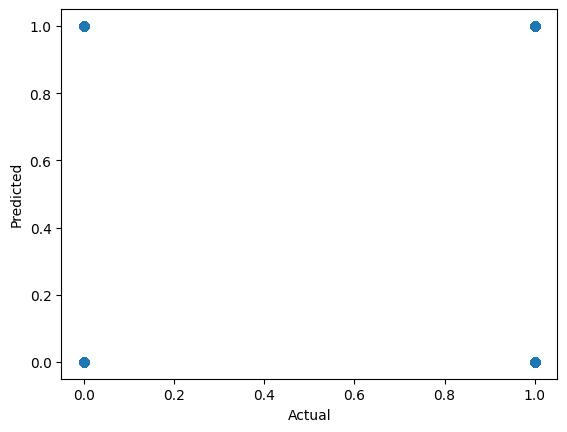

In [74]:
#plot y_test and y_pred
import matplotlib.pyplot as plt
plt.scatter(y_test,y_test_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [76]:
#difference between actual and predicted values
pred_df=pd.DataFrame({"Actual value":y_test,"predicted value":y_test_pred,"difference":y_test-y_test_pred})
pred_df

,Actual value,predicted value,difference
2910,0,0,0
22981,0,0,0
22077,0,0,0
2946,0,0,0
5490,0,0,0
17062,0,0,0
11154,0,0,0
28151,0,0,0
6137,1,0,1
19786,0,0,0
